<a href="https://colab.research.google.com/github/Gaoshu-root/Code-related-courses/blob/main/mathematics-modeling_%20Notes/%E3%80%8A%E6%95%B0%E5%AD%A6%E5%BB%BA%E6%A8%A1%E3%80%8B_%E5%8D%8E%E4%B8%AD%E5%86%9C%E4%B8%9A%E5%A4%A7%E5%AD%A6%20%E7%AC%AC%2016%20%E6%AC%A1%E5%BC%80%E8%AF%BE/P12%20%E9%81%97%E4%BC%A0%E7%AE%97%E6%B3%95%20%E5%92%8C%20%E8%9A%81%E7%BE%A4%E7%AE%97%E6%B3%95/12.4-12.5%20%E8%9A%81%E7%BE%A4%E7%AE%97%E6%B3%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

链接： [《数学建模》_华中农业大学 第 16 次开课](https://www.icourse163.org/learn/HZAU-1001658002?tid=1472021457#/learn/content)

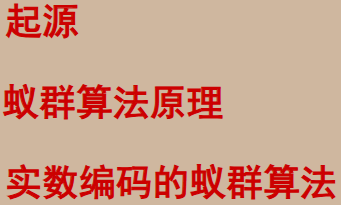

仿生学

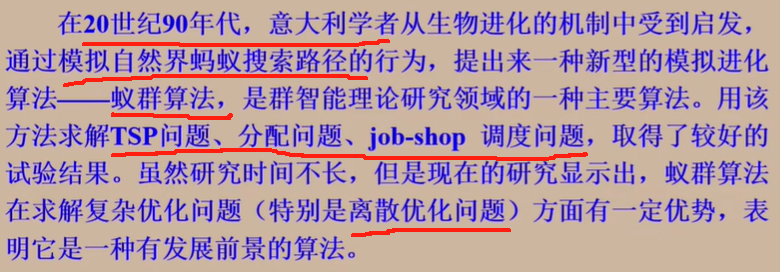

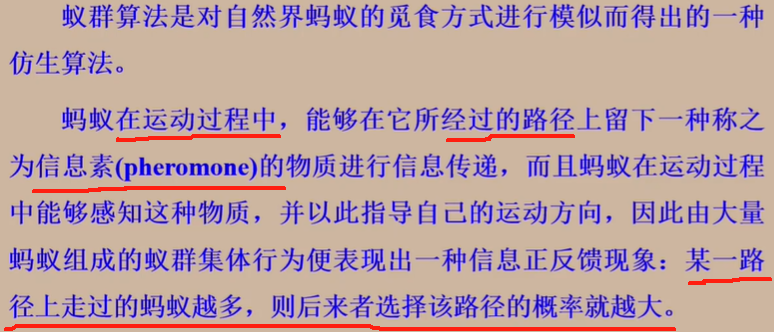

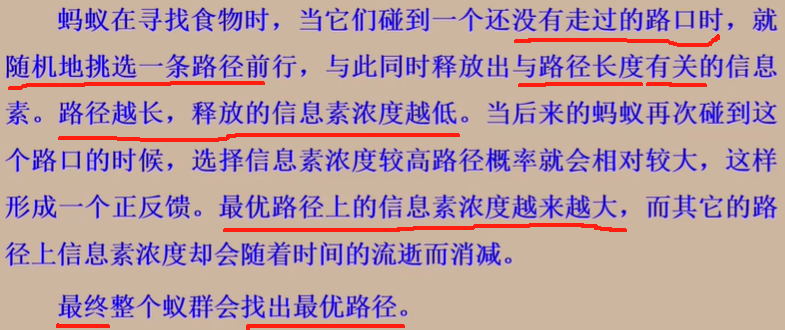

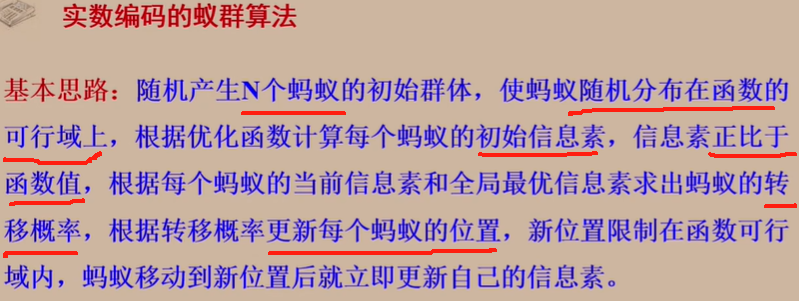

## 12.5 应用示例  这个例子不好，改用 遗传算法求解

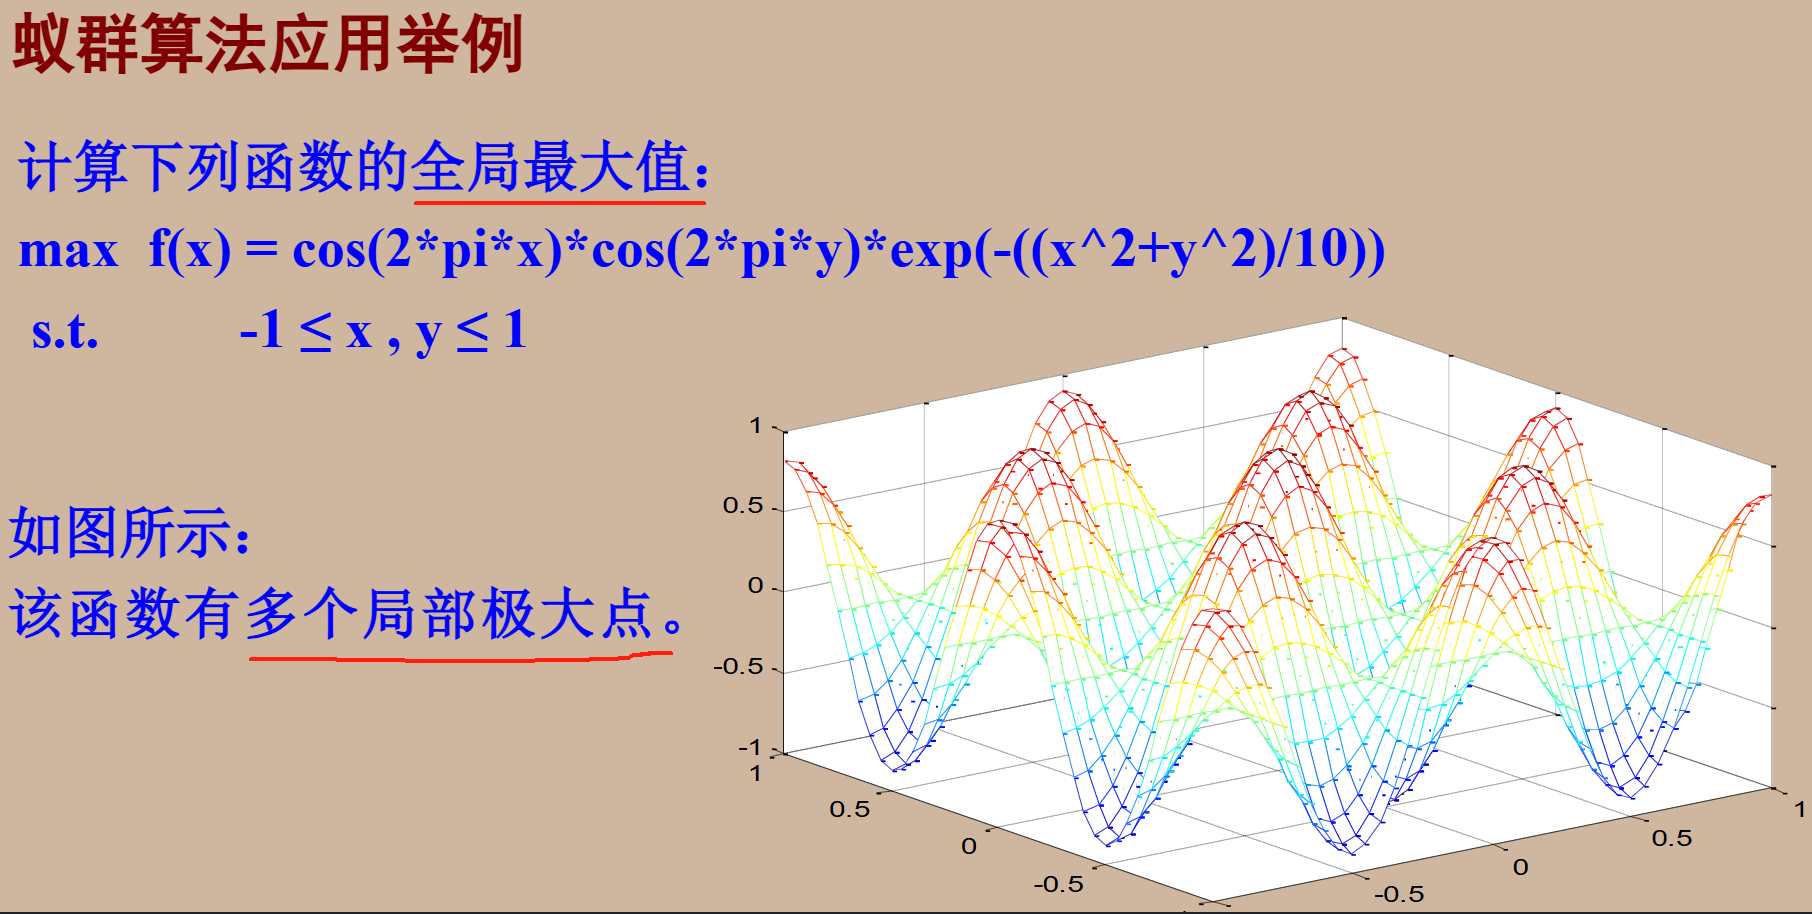

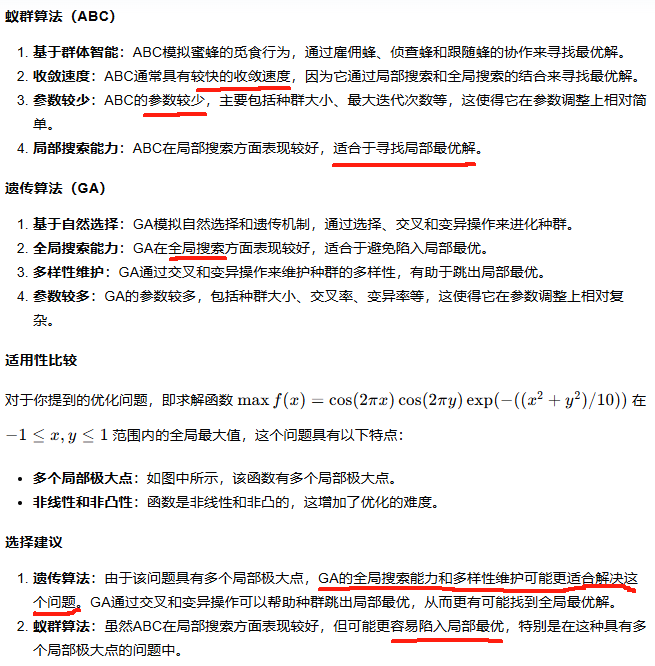

https://scikit-opt.github.io/scikit-opt/#/en/README?id=_5-aca-ant-colony-algorithm-for-tsp

In [2]:
!pip install scikit-opt

best_x: [-2.98023233e-08  9.76592331e-04] 
 best_y: [-0.99998108]


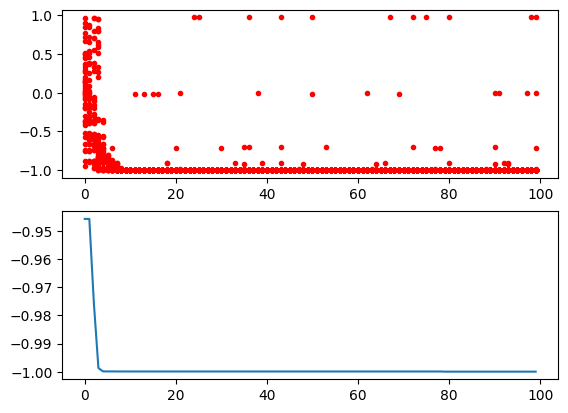

In [11]:
## !pip install scikit-opt

# https://scikit-opt.github.io/scikit-opt/#/en/README?id=_2-genetic-algorithm

# 定义问题
import numpy as np


def schaffer(p):
    '''
    This function has plenty of local minimum, with strong shocks
    global minimum at (0,0) with value 0
    '''
    x, y = p
    return -np.cos(2 * np.pi * x) * np.cos(2 * np.pi * y) * np.exp(-((x**2 + y**2) / 10))

# 执行遗传算法
from sko.GA import GA

# prob_mut: probability of mutation 变异率
ga = GA(func=schaffer, n_dim=2, size_pop=50, max_iter=100, prob_mut=0.001, lb=[-1, -1], ub=[1, 1], precision=1e-7)

best_x, best_y = ga.run()
print('best_x:', best_x, '\n', 'best_y:', best_y)

# 绘图
import pandas as pd
import matplotlib.pyplot as plt

Y_history = pd.DataFrame(ga.all_history_Y)
fig, ax = plt.subplots(2, 1)
ax[0].plot(Y_history.index, Y_history.values, '.', color='red')
Y_history.min(axis=1).cummin().plot(kind='line')
plt.show()

# 可视化目标函数的历史最小值 和 最小值的累积值，已收敛